# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     | Francisco Tinoco  |
| **Fecha**      | 02-02-2026  |
| **Expediente** |  746080  |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [4]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 2.1 MB/s eta 0:00:05
   ----- ---------------------------------- 1.3/9.6 MB 2.6 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.6 MB 2.6 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.6 MB 2.5 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.6 MB 2.5 MB/s eta 0:00:03
   -------------- ------------------------- 3.4/9.6 MB 2.5 MB/s eta 0:00:03
   ---------------- ----------------------- 3.9/9.6 MB 2.5 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.6 MB 2.5 MB/s eta 0:00:03
   -------------------- ------------------- 5.0/9.6 MB 2.5 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.6 MB 2.4 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.6 MB 2.4 MB/s eta 0:00:02
   -----------------------

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [7]:
datos = pd.read_csv('../Data/Advertising.csv')
datos.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
print("Tamaño:", datos.shape)
datos.describe()

Tamaño: (200, 5)


,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.

- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

En este caso es importante saber si hay relacion porque si no la hay, estariamos gastando dinero en publicidad sin que eso afecte las ventas. Seria un desperdicio de recursos.

**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

Si nos sirve, porque asi podemos saber cuanto aumentan las ventas por cada peso que invertimos en publicidad. Esto nos ayuda a tomar mejores decisiones de presupuesto.

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

In [9]:
#Variables
x_tv = datos['TV'].values
y = datos['sales'].values
n = len(y)

In [10]:
#Regresion
X_tv = x_tv.reshape(-1, 1)
modelo_tv = LinearRegression()
modelo_tv.fit(X_tv, y)

print("Beta 0 (intercepto):", modelo_tv.intercept_)
print("Beta 1 (TV):", modelo_tv.coef_[0])

Beta 0 (intercepto): 7.032593549127695
Beta 1 (TV): 0.04753664043301975


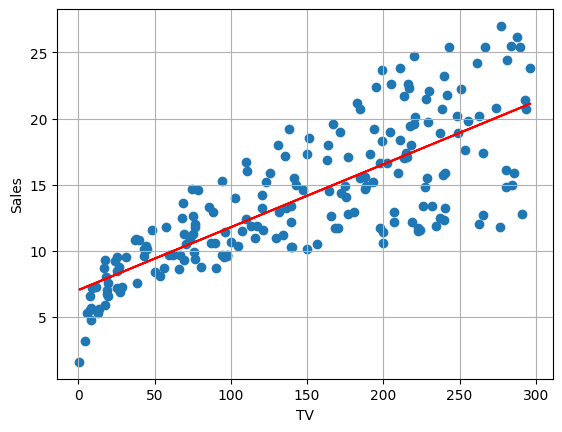

In [11]:
#Graficar
plt.figure()
plt.scatter(x_tv, y)
plt.plot(x_tv, modelo_tv.predict(X_tv), color='red')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid()
plt.show()

### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

La poblacion es el conjunto completo de todos los datos que existen. La muestra es solo una parte de esa poblacion que usamos para hacer nuestro analisis.

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

Que con la poblacion tendriamos los coeficientes verdaderos. Con una muestra solo tenemos estimados que pueden variar dependiendo de que muestra tomemos.

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [12]:
#Calcular RSS y RSE
y_pred_tv = modelo_tv.predict(X_tv)
RSS = np.sum((y - y_pred_tv)**2)
p = 2  # numero de parametros (beta0 y beta1)
RSE = np.sqrt(RSS / (n - p))
print("RSS:", RSS)
print("RSE:", RSE)

RSS: 2102.5305831313512
RSE: 3.2586563686504624


In [13]:
#Calcular errores estandar
x_media = np.mean(x_tv)
suma_cuadrados = np.sum((x_tv - x_media)**2)

SE_beta1 = np.sqrt(RSE**2 / suma_cuadrados)
SE_beta0 = np.sqrt(RSE**2 * (1/n + x_media**2 / suma_cuadrados))

print("SE(beta0):", SE_beta0)
print("SE(beta1):", SE_beta1)

SE(beta0): 0.4578429402734785
SE(beta1): 0.0026906071877968707


Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [14]:
#Intervalos de confianza 95%
beta0 = modelo_tv.intercept_
beta1 = modelo_tv.coef_[0]

IC_beta0 = [beta0 - 2*SE_beta0, beta0 + 2*SE_beta0]
IC_beta1 = [beta1 - 2*SE_beta1, beta1 + 2*SE_beta1]

print("IC 95% para beta0:", IC_beta0)
print("IC 95% para beta1:", IC_beta1)

IC 95% para beta0: [np.float64(6.116907668580738), np.float64(7.948279429674652)]
IC 95% para beta1: [np.float64(0.04215542605742601), np.float64(0.05291785480861349)]


Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

La hipotesis nula dice que no hay relacion entre X y Y, o sea que beta1 = 0. La hipotesis alternativa dice que si hay relacion, o sea que beta1 es diferente de cero.

Para probal la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [15]:
# Estadistico t (probamos contra mu = 0)
t_beta0 = (beta0 - 0) / SE_beta0
t_beta1 = (beta1 - 0) / SE_beta1

print("t para beta0:", t_beta0)
print("t para beta1:", t_beta1)

t para beta0: 15.360275174117547
t para beta1: 17.667625600875546


La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [16]:
from scipy import stats

# p-values
p_beta0 = 2 * (1 - stats.t.cdf(np.abs(t_beta0), n - p))
p_beta1 = 2 * (1 - stats.t.cdf(np.abs(t_beta1), n - p))

print("p-value para beta0:", p_beta0)
print("p-value para beta1:", p_beta1)

p-value para beta0: 0.0
p-value para beta1: 0.0


¿Se rechaza la hipótesis nula? ¿Qué significa?

Si se rechaza la hipotesis nula porque el p-value es muy pequeño (menor que 0.05). Esto significa que si hay una relacion significativa entre el gasto en TV y las ventas.

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

In [17]:
# Hacemos la funcion para hacer todo el analisis
def analisis_regresion(x, y, nombre):
    n = len(y)
    p = 2
    
    # Regresion
    X = x.reshape(-1, 1)
    modelo = LinearRegression()
    modelo.fit(X, y)
    
    beta0 = modelo.intercept_
    beta1 = modelo.coef_[0]
    
    # RSS y RSE
    y_pred = modelo.predict(X)
    RSS = np.sum((y - y_pred)**2)
    RSE = np.sqrt(RSS / (n - p))
    
    # Errores estandar
    x_media = np.mean(x)
    suma_cuadrados = np.sum((x - x_media)**2)
    SE_beta1 = np.sqrt(RSE**2 / suma_cuadrados)
    SE_beta0 = np.sqrt(RSE**2 * (1/n + x_media**2 / suma_cuadrados))
    
    # Estadisticos t
    t_beta0 = beta0 / SE_beta0
    t_beta1 = beta1 / SE_beta1
    
    # p-values
    p_beta0 = 2 * (1 - stats.t.cdf(np.abs(t_beta0), n - p))
    p_beta1 = 2 * (1 - stats.t.cdf(np.abs(t_beta1), n - p))
    
    # Imprimir resultados
    print("=" * 50)
    print("REGRESION: Sales ~", nombre)
    print("=" * 50)
    print("\nCoeficientes:")
    print("  Beta 0:", round(beta0, 4))
    print("  Beta 1:", round(beta1, 4))
    print("\nErrores estandar:")
    print("  SE(beta0):", round(SE_beta0, 4))
    print("  SE(beta1):", round(SE_beta1, 4))
    print("\nIntervalos de confianza 95%:")
    print("  Beta 0: [", round(beta0 - 2*SE_beta0, 4), ",", round(beta0 + 2*SE_beta0, 4), "]")
    print("  Beta 1: [", round(beta1 - 2*SE_beta1, 4), ",", round(beta1 + 2*SE_beta1, 4), "]")
    print("\nEstadisticos t:")
    print("  t(beta0):", round(t_beta0, 4))
    print("  t(beta1):", round(t_beta1, 4))
    print("\np-values:")
    print("  p(beta0):", p_beta0)
    print("  p(beta1):", p_beta1)
    print("\nObservacion: p-value <0.05 significa que es significativo")
    print()

In [18]:
x_radio = datos['radio'].values
analisis_regresion(x_radio, y, 'Radio')

REGRESION: Sales ~ Radio

Coeficientes:
  Beta 0: 9.3116
  Beta 1: 0.2025

Errores estandar:
  SE(beta0): 0.5629
  SE(beta1): 0.0204

Intervalos de confianza 95%:
  Beta 0: [ 8.1858 , 10.4374 ]
  Beta 1: [ 0.1617 , 0.2433 ]

Estadisticos t:
  t(beta0): 16.5422
  t(beta1): 9.9208

p-values:
  p(beta0): 0.0
  p(beta1): 0.0

Observacion: p-value <0.05 significa que es significativo



In [19]:
x_news = datos['newspaper'].values
analisis_regresion(x_news, y, 'Newspaper')

REGRESION: Sales ~ Newspaper

Coeficientes:
  Beta 0: 12.3514
  Beta 1: 0.0547

Errores estandar:
  SE(beta0): 0.6214
  SE(beta1): 0.0166

Intervalos de confianza 95%:
  Beta 0: [ 11.1086 , 13.5942 ]
  Beta 1: [ 0.0215 , 0.0878 ]

Estadisticos t:
  t(beta0): 19.8761
  t(beta1): 3.2996

p-values:
  p(beta0): 0.0
  p(beta1): 0.0011481958688881466

Observacion: p-value <0.05 significa que es significativo



## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [21]:
# Preparar X con las 3 variables
X_mult = datos[['TV', 'radio', 'newspaper']].values

# Agregar columna de unos para el intercepto
X_mult = sm.add_constant(X_mult)

In [22]:
# Hacer la regresion multiple
ols = sm.OLS(y, X_mult)
results = ols.fit()

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 02 Feb 2026   Prob (F-statistic):           1.58e-96
Time:                        11:02:18   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

En la regresion simple, newspaper tenia un p-value significativo

Pero en la regresion multiple, el p-value de newspaper es alto (no significativo)
 
* Esto pasa porque newspaper esta correlacionado con radio
* Cuando incluimos las 3 variables, newspaper ya no aporta informacion nueva
porque su efecto ya esta capturado por las otras variables

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*